# Lab 7.01 - Time series analysis

In [111]:
# Package imports for data science and time series analysis in particular
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 1 - House sales

The file House Sales.csv contains monthly data on the number of new one-family
houses sold in the United States (in thousands) from January 1991 through December 2011.
Housing sales were steadily trending upward until about the beginning of 2006, then the
bottom fell out of the housing market, and sales eventually started trending upward again.   

- First Create a time series chart of the data.
- Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.
- Add predictions for Simple Exponential Smooting to the dataframe.
- Add predictions for Double Exponential Smoothing to the dataframe.
- Calculate the MAE to find the best model

In [112]:
df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
df.head()

/tmp/ipykernel_27751/2692649942.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/Monthly%20House%20Sales.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])


,Houses Sold
Month,
jan/91,401
feb/91,482
mrt/91,507
apr/91,508
mei/91,517


First Create a time series chart of the data.

<Axes: xlabel='Month'>

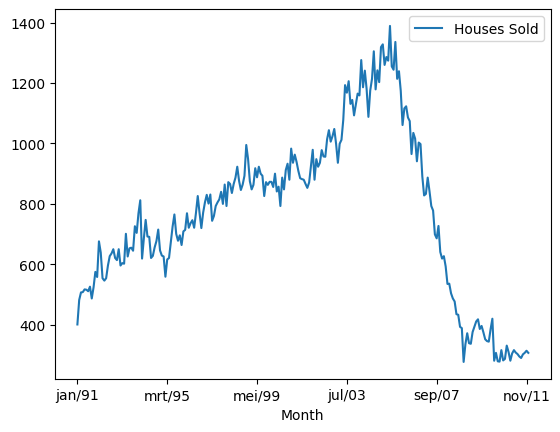

In [113]:
df.plot()

Add predictions for Simple Moving Average with span of 3, 6 and 12 months to the dataframe.

<Axes: xlabel='Month'>

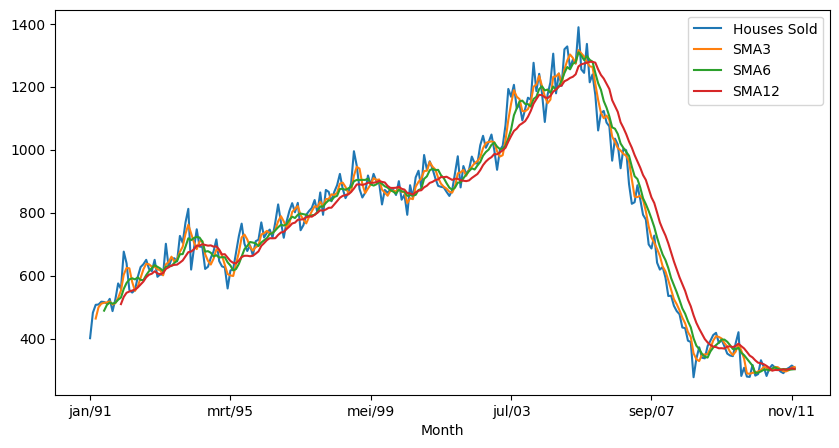

In [114]:
df['SMA3'] = df['Houses Sold'].rolling(3).mean()
df['SMA6'] = df['Houses Sold'].rolling(6).mean()
df['SMA12'] = df['Houses Sold'].rolling(12).mean()

df.plot(y=['Houses Sold', 'SMA3',	'SMA6',	'SMA12'], figsize=[10,5])

Add predictions for Simple Exponential Smooting to the dataframe.

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predi

<Axes: xlabel='Month'>

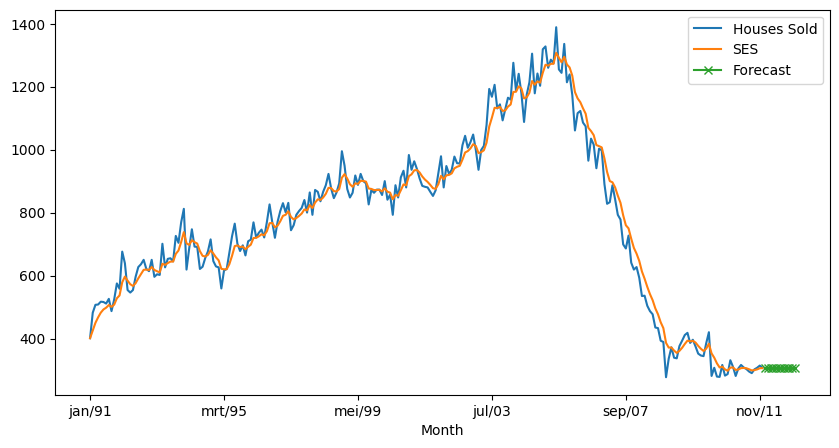

In [115]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

data_ses = SimpleExpSmoothing(df['Houses Sold']).fit(smoothing_level=0.3)
data_ses_fcast = data_ses.forecast(12) 
df['SES'] = data_ses.level

df.plot(y=['Houses Sold',  'SES'], figsize=[10,5])
data_ses_fcast.plot(marker='x', legend=True, label='Forecast')

Add predictions for Double Exponential Smoothing to the dataframe.

/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/codespace/.local/lib/python3.10/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)
/home/codespace/.python/current/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_predi

<Axes: xlabel='Month'>

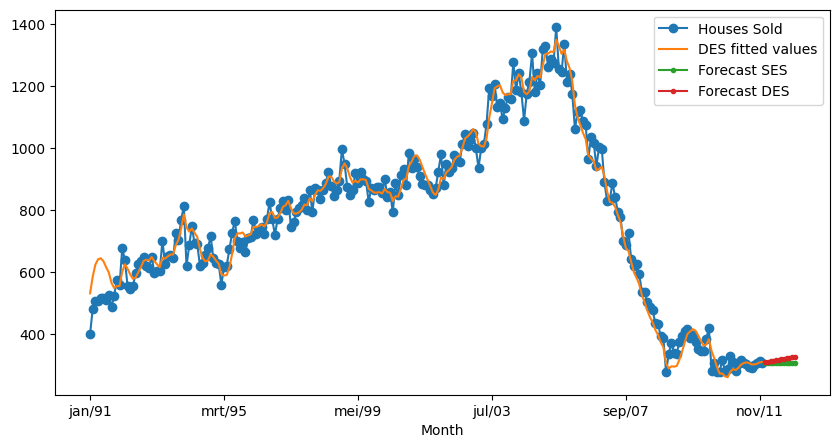

In [116]:
from statsmodels.tsa.api import Holt

# Uses the trend of previous time (bt)
# smoothing_level=.1 == alpha
# smoothing_trend=.2 == beta

data_des = Holt(df['Houses Sold']).fit(smoothing_level=.3, smoothing_trend=.3)

df['DES'] = data_des.level + 1 *  data_des.trend
# df.plot(y=['number_of_heavily_wounded',  'DES'], figsize=[10,5])
# 12 = points in the future
data_des_fcast = data_des.forecast(12)
df['Houses Sold'].plot(marker='o', legend=True) # Observations
df['DES'].plot(legend=True, label='DES fitted values', figsize=[10,5])              
data_ses_fcast.plot(marker='.', legend=True, label='Forecast SES')
data_des_fcast.plot(marker='.', legend=True, label='Forecast DES') 

Calculate the MAE to find the best model. First drop the rows with NaN.

In [117]:
df.head()

,Houses Sold,SMA3,SMA6,SMA12,SES,DES
Month,,,,,,
jan/91,401,NaN,NaN,NaN,401.0000,531.410000
feb/91,482,NaN,NaN,NaN,425.3000,585.850100
mrt/91,507,463.333333,NaN,NaN,449.8100,624.361661
apr/91,508,499.000000,NaN,NaN,467.2670,641.147204
mei/91,517,510.666667,NaN,NaN,482.1869,644.423836


In [118]:
df = df.dropna()
df.head()

,Houses Sold,SMA3,SMA6,SMA12,SES,DES
Month,,,,,,
dec/91,558,552.333333,530.166667,509.333333,536.865441,554.580767
jan/92,676,603.000000,557.666667,532.250000,578.605809,600.653231
feb/92,639,624.333333,576.500000,545.333333,596.724066,625.255166
mrt/92,554,623.000000,587.666667,549.250000,583.906846,610.563555
apr/92,546,579.666667,591.333333,552.416667,572.534792,592.068707


In [119]:
columns = ['SMA3', 'SMA6', 'SMA12', 'SES', 'DES']
df[columns] = df[columns].shift(1)

/tmp/ipykernel_27751/4081484057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].shift(1)


In [123]:
df.head()
df = df.dropna()

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for c in columns:
    print(f'MAE ({c}) = {mean_absolute_error(df["Houses Sold"] , df[c]) }') 
    # actual value vs predicted

MAE (SMA3) = 40.86666666666666
MAE (SMA6) = 46.57916666666666
MAE (SMA12) = 62.24791666666667
MAE (SES) = 43.55338386520248
MAE (DES) = 40.34109136262235


## Source
Business Analytics Data Analysis & Decision Making 